# Looking at Ellis Act parcel outcomes

What happens to Ellised properties

- Group by APN to look at redevelopments
- Units withdrawn and total units on the new parcel 
- Built year of original parcel and built year of the new parcel (see if it was redeveloped)
- Use description pie chart
- of the new use descriptions, what are the usetype

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
ellisdf=pd.read_csv('../UP229_Ellis/cleaned_ellis.csv', index_col=0)

In [18]:
ellisdf.head(3)

,ain,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,units,sqftmain,generalusetype,specificusetype,center_lat,center_lon,geometry,ain_2021,objectid,apn,situsfulladdress,usecode,usetype,usedescription,yearbuilt1,units1,sqftmain1,yearbuilt2,units2,sqftmain2,yearbuilt3,units3,sqftmain3,yearbuilt4,units4,sqftmain4,yearbuilt5,units5,sqftmain5,ownerfullname,mailaddress,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_2021,center_lon_2021,lat_lon,shape_length,shape_area
0,2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955.0,3.0,1860.0,Residential,Three Units (Any Combination),34.165880,-118.621319,POINT (-13204864.81828771 4051097.450097568),2.040031e+09,20964.0,2040-031-029,22729 DEL VALLE ST LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955.0,3.0,1860.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165880,-118.621319,"34.165880, -118.621319",359.764599,6493.890249
1,2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,3.0,1869.0,Residential,Three Units (Any Combination),34.165929,-118.621164,POINT (-13204847.61386041 4051104.006178072),2.040031e+09,20965.0,2040-031-030,22727 DEL VALLE ST APT 0001 LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955.0,3.0,1869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165929,-118.621164,"34.165929, -118.621164",359.757625,6494.458710
2,2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,3.0,1869.0,Residential,Three Units (Any Combination),34.167389,-118.616525,POINT (-13204331.1860447 4051300.523521864),2.040033e+09,21007.0,2040-033-033,22425 DEL VALLE STREET WOODLAND HILLS CA 91364,0500,Residential,Five or more apartments,2018.0,5.0,6514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B WELLO INVESTMENT LLC,10633 EMERSON BND,TUSTIN CA,92782-1480,20190327,2725027.0,34.167389,-118.616525,"34.167389, -118.616525",359.997596,6499.826055


## Cleaning Datset

- ain_2021 --> string
- yearbuilt --> int
- zip --> string
- lastsaledate --> datetime
- application_received --> datetime

In [19]:
# dates into date times
ellisdf['application_received'] = pd.to_datetime(ellisdf['application_received'])
ellisdf.rename(columns={"application_received": "app_date"}, inplace = True)
ellisdf['lastsaledate1']=ellisdf['lastsaledate'].astype(float).astype(int).astype(str)
ellisdf['lastsaledate1'] = pd.to_datetime(ellisdf['lastsaledate1'],infer_datetime_format=True, errors='coerce')


In [76]:
# ain to string
ellisdf['ain_2021']=ellisdf['ain_2021'].astype(float).astype(int)

# yearbuilt to int
ellisdf['yearbuilt'] = ellisdf['yearbuilt'].astype('Int64')
ellisdf['yearbuilt1'] = ellisdf['yearbuilt1'].astype('Int64')
ellisdf['yearbuilt2'] = ellisdf['yearbuilt1'].astype('Int64')
ellisdf['yearbuilt3'] = ellisdf['yearbuilt1'].astype('Int64')
ellisdf['yearbuilt4'] = ellisdf['yearbuilt1'].astype('Int64')
ellisdf['yearbuilt5'] = ellisdf['yearbuilt1'].astype('Int64')

# get total units on parcels
ellisdf['2019_units'] = ellisdf[['units1', 'units2','units3','units4','units5']].sum(axis=1)
ellisdf.rename(columns={"units": "2006_units"}, inplace = True)

#use type names
ellisdf.rename(columns={"generalusetype": "usetype06"}, inplace = True)
ellisdf.rename(columns={"specificusetype": "usedescrip06"}, inplace = True)
ellisdf.rename(columns={"usetype": "usetype19"}, inplace = True)
ellisdf.rename(columns={"usedescription": "usedescrip19"}, inplace = True)

ellisdf.head(3)


,ain,app_date,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,2006_units,sqftmain,usetype06,usedescrip06,center_lat,center_lon,geometry,ain_2021,objectid,apn,situsfulladdress,usecode,usetype19,usedescrip19,yearbuilt1,units1,sqftmain1,yearbuilt2,units2,sqftmain2,yearbuilt3,units3,sqftmain3,yearbuilt4,units4,sqftmain4,yearbuilt5,units5,sqftmain5,ownerfullname,mailaddress,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_2021,center_lon_2021,lat_lon,shape_length,shape_area,lastsaledate1,2019_units,res06,res19,redev
0,2040031029,2019-11-06,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955,3.0,1860.0,Residential,Three Units (Any Combination),34.165880,-118.621319,POINT (-13204864.81828771 4051097.450097568),2040031029,20964.0,2040-031-029,22729 DEL VALLE ST LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955,3.0,1860.0,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165880,-118.621319,"34.165880, -118.621319",359.764599,6493.890249,2017-12-28,3.0,True,True,True
1,2040031030,2019-12-04,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955,3.0,1869.0,Residential,Three Units (Any Combination),34.165929,-118.621164,POINT (-13204847.61386041 4051104.006178072),2040031030,20965.0,2040-031-030,22727 DEL VALLE ST APT 0001 LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955,3.0,1869.0,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165929,-118.621164,"34.165929, -118.621164",359.757625,6494.458710,2017-12-28,3.0,True,True,True
2,2040033033,2016-02-10,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955,3.0,1869.0,Residential,Three Units (Any Combination),34.167389,-118.616525,POINT (-13204331.1860447 4051300.523521864),2040033033,21007.0,2040-033-033,22425 DEL VALLE STREET WOODLAND HILLS CA 91364,0500,Residential,Five or more apartments,2018,5.0,6514.0,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN,B WELLO INVESTMENT LLC,10633 EMERSON BND,TUSTIN CA,92782-1480,20190327,2725027.0,34.167389,-118.616525,"34.167389, -118.616525",359.997596,6499.826055,2019-03-27,5.0,True,True,True


## Calculate Average Time to File

An important piece in policy discussions surrounding the Ellis Act is the amount of time that a landlord waits between buying a property and filing for the Ellis Act. The Act was passed to in theory allow small landlords to exit the rental market. However, corporate landlords are buying properties and using the Ellis Act to flip the properties by evicting tenants, renovating, and selling units off as condos. How quickly are most properties being sold?

In [27]:
nulldates=ellisdf[pd.isna(ellisdf['lastsaledate1'])]
print(len(nulldates))
print(len(ellisdf))
print(len(nulldates)/len(ellisdf))

1170
4594
0.2546800174140183


### Drop Nulls
It would appear that about 1/4 of our dataset do not have a last sale date. This is probably because the parcels were rebuilt and have not been sold since. We then analyzed the remaining data but this is excluding all of the rebuilt parcels, which is not very useful.  

In [32]:
ellisdf2 = ellisdf.dropna(axis=0, how="any", thresh=None, subset=['lastsaledate1'], inplace=False)

In [33]:
print(len(ellisdf))
print(len(ellisdf2))

4594
3424


### Create Variable Representing App Wait Time

In [35]:
ellisdf2['sellappdiff_D'] = ellisdf2['app_date']-ellisdf2['lastsaledate1']

<ipython-input-35-083f5c6b3a0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellisdf2['sellappdiff_D'] = ellisdf2['app_date']-ellisdf2['lastsaledate1']


In [38]:
# Lapsed time in months between sell date and app date
def monthdiff (row):
    value = row['app_date'].month - row['lastsaledate1'].month + 12*(row['app_date'].year - row['lastsaledate1'].year) + (row['app_date'].day - row['lastsaledate1'].day)/30.4375
    value = round(value,2)
    return value
    
ellisdf2['sellappdiff_M'] = ellisdf2.apply (lambda row: monthdiff(row), axis=1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ellisdf2.sellappdiff_M.value_counts())

-50.43     78
-14.39     14
-72.49     12
 1.07      12
-72.53     12
-72.62     12
 1.84       9
 39.28      8
 2.47       7
-24.00      7
-41.79      7
-27.10      7
 0.16       6
 1.30       6
 2.07       6
 3.67       6
-74.69      6
 0.46       5
 0.70       5
 14.03      5
-53.84      5
 2.74       5
 4.26       5
-28.74      5
 4.13       5
-42.03      5
-103.67     5
 3.16       5
-29.08      5
 5.67       5
-30.77      5
-44.10      4
-145.36     4
-89.43      4
 0.47       4
 12.90      4
-104.53     4
-1.13       4
-96.36      4
-52.84      4
 14.80      4
 7.34       4
 100.00     4
-108.07     4
-145.39     4
-29.64      4
-45.57      4
-41.90      4
-31.07      4
 2.93       4
-89.67      4
-3.03       4
-35.43      4
 2.67       4
 4.07       4
 2.61       4
 2.03       4
 22.84      4
-29.10      4
-28.49      4
-120.53     4
 10.13      4
 0.36       4
-5.90       4
-120.36     4
 3.23       4
-46.03      4
 3.64       4
-33.39      4
-9.59       4
-145.49     4
 3.97 

<ipython-input-38-f6b8a0f4a915>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellisdf2['sellappdiff_M'] = ellisdf2.apply (lambda row: monthdiff(row), axis=1)


In [39]:
# Lapsed time in years between sell date and app date
ellisdf2['sellappdiff_Y'] = ellisdf2['sellappdiff_M']/12
ellisdf2.sellappdiff_Y = ellisdf2.sellappdiff_Y.round(2)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ellisdf2.sellappdiff_Y.value_counts())

-4.20     78
-6.04     24
 0.09     18
 0.06     18
 0.15     16
 0.21     16
-1.20     15
 0.24     15
 0.31     14
 0.38     13
 0.04     13
 0.17     13
 0.13     13
 0.61     13
 0.11     12
 0.26     12
 0.22     12
-6.05     12
 0.30     11
 0.20     11
 0.34     11
 0.01     11
 0.84     11
 0.03     10
-2.80     10
 0.33     10
 0.69     10
-3.50     10
 0.63     10
 0.23     10
-2.26      9
-2.47      9
-4.40      9
 0.37      9
-2.78      9
-2.56      9
-2.59      9
 0.59      9
-2.07      9
-3.49      9
-3.48      9
 3.27      9
 0.14      9
 0.19      8
 0.48      8
-2.37      8
-0.49      8
-12.12     8
 0.27      8
 0.70      8
-10.04     8
 0.10      8
-0.60      8
 0.12      8
 1.28      7
 0.44      7
 0.47      7
-3.68      7
-3.80      7
-2.00      7
 0.49      7
 0.74      7
 0.36      7
-0.92      7
-2.76      7
-0.71      7
-4.77      7
-2.32      6
-2.30      6
 0.05      6
-1.38      6
 0.16      6
 1.23      6
-0.25      6
-2.40      6
-1.69      6
-2.60      6

<ipython-input-39-83111aed6a0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellisdf2['sellappdiff_Y'] = ellisdf2['sellappdiff_M']/12
/Users/mirandamead-newton/opt/anaconda3/envs/UDS/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ellisdf2.sellappdiff_D.value_counts())

In [40]:
# Negative or positive lapsed time
def binary_apptimenegative (row):
    if row['sellappdiff_M'] <= 0:
        value = 0
    elif row['sellappdiff_M'] > 0:
        value = 1
    return value
    
ellisdf2['apptimeneg'] = ellisdf2.apply (lambda row: binary_apptimenegative(row), axis=1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ellisdf2.apptimeneg.value_counts())

0    1763
1    1661
Name: apptimeneg, dtype: int64


<ipython-input-40-4e0c9289bebf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellisdf2['apptimeneg'] = ellisdf2.apply (lambda row: binary_apptimenegative(row), axis=1)


Over half of the remaining data have a negative difference between the sell date and Ellis Act application which means they were sold after being Ellised. I'm curious about why this would be. The units aren't condos or they would have a new AIN, so they must still be sold as the whole building. Is the original owner illegally renting the building out before selling it? Are they just leaving it vacant and then selling it off?

In [41]:
ellisfilter = ellisdf2[ellisdf2.apptimeneg == 1]
print(ellisfilter.sellappdiff_Y.mean())
print(ellisfilter.sellappdiff_Y.median())
print(len(ellisfilter))

7.139446116797109
1.87
1661


Of the remaining data (only about 1/4 of the parcels) we can see that the average year waited before Ellising a property is around 7 years but the median is less than two years. 

In [53]:

#ellisfilter
ellis6mo = ellisfilter.query('sellappdiff_M <= 1', inplace = False)
ellis1year = ellisfilter.query('sellappdiff_Y <= 1', inplace = False)
ellis5year = ellisfilter.query('sellappdiff_Y <= 5', inplace = False)
print((len(ellis5year)/len(ellisfilter)),'percent of parcels were Ellised within 5 years of purchase date')
print(len(ellis1year)/len(ellisfilter),'percent of parcels were Ellised within 1 year of purchase date')
print(len(ellis6mo)/len(ellisfilter),'percent of parcels were Ellised within 6 months of purchase date')


0.6568332329921734 percent of parcels were Ellised within 5 years of purchase date
0.3877182420228778 percent of parcels were Ellised within 1 year of purchase date
0.045755568934376885 percent of parcels were Ellised within 6 months of purchase date


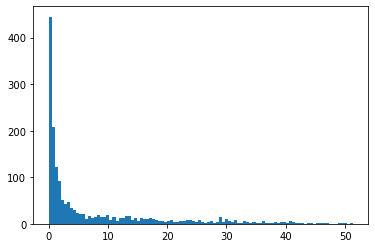

In [42]:
x = ellisfilter.sellappdiff_Y
plt.hist(x, bins = 100)
plt.show()

## Use Value Data

How did the use types (residential, comercial, etc) change for the parcels from 2006 to 2019? Did we lose residential parcels to comercial and other uses?

### Looking at use value for 2019

In [55]:
print(ellisdf['usedescrip19'].unique())

['Three Units (Any Combination)' 'Five or more apartments' 'Two Units'
 'Single' 'Professional Buildings' 'Four Units (Any Combination)'
 'Commercial' 'Churches' 'Store Combination'
 'Auto, Recreation EQPT, Construction EQPT, Sales & Service'
 'Office Buildings' 'Hotel & Motels' 'Schools (Private)' 'Stores'
 'Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. Prnt Plnts'
 'Government Parcel' 'Parking Lots (Commercial Use Properties)' nan
 'Institutional' 'Bowling Alleys' 'Homes For Aged & Others'
 'Rooming Houses' 'Warehousing, Distribution, Storage'
 'Srvc Shps:Radio, TV, Refrig, Pnt Shp' 'Restaurants, Cocktail Lounges'
 'Theaters']


In [56]:
use = ellisdf['usedescrip19'].value_counts().sort_index(ascending=True)
use.to_frame()

,usedescrip19
"Auto, Recreation EQPT, Construction EQPT, Sales & Service",5
Bowling Alleys,1
Churches,10
Commercial,13
Five or more apartments,905
Four Units (Any Combination),279
Government Parcel,9
Homes For Aged & Others,3
Hotel & Motels,7
Institutional,2


In [57]:
use1 = ellisdf['usetype19'].value_counts()
use1.to_frame()

,usetype19
Residential,4424
Commercial,128
Institutional,24
Government,9
Industrial,5
Recreational,2


### Group by to look at use types for 2006 and 2019 and compare changes

In [58]:
use2 = ellisdf.groupby(['usetype19','usedescrip19','usetype06','usedescrip06']).sum().reset_index().sort_index(ascending=True)
use2 = use2[['usetype06','usedescrip06','usetype19','usedescrip19','units_withdrawn','2006_units','2019_units']]
pd.set_option('display.max_colwidth', -1)
use2.head(60)

<ipython-input-58-99f92d54e81a>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,usetype06,usedescrip06,usetype19,usedescrip19,units_withdrawn,2006_units,2019_units
0,Commercial,"Auto, Recreation Equipment, Construction Equipment Sales and Service",Commercial,"Auto, Recreation EQPT, Construction EQPT, Sales & Service",5,5.0,0.0
1,Residential,Three Units (Any Combination),Commercial,"Auto, Recreation EQPT, Construction EQPT, Sales & Service",12,12.0,6.0
2,Commercial,Commercial,Commercial,Commercial,3,3.0,3.0
3,Commercial,Store,Commercial,Commercial,2,4.0,0.0
4,Commercial,Store Combination,Commercial,Commercial,5,4.0,0.0
5,Residential,"Double, Duplex, or Two Units",Commercial,Commercial,6,6.0,0.0
6,Residential,Five or More Units or Apartments (Any Combination),Commercial,Commercial,46,46.0,85.0
7,Residential,Four Units (Any Combination),Commercial,Commercial,7,8.0,0.0
8,Commercial,Hotel and Motel,Commercial,Hotel & Motels,64,62.0,230.0
9,Residential,Five or More Units or Apartments (Any Combination),Commercial,Hotel & Motels,25,25.0,104.0


### Create a variable for "residential" that's more inclusive using use descriptions for 2006 and 2019

In [59]:
print(ellisdf['usedescrip06'].unique())

['Three Units (Any Combination)' 'Double, Duplex, or Two Units'
 'School (Private)' 'Four Units  (Any Combination)' 'Store'
 'Single Family Residence'
 'Five or More Units or Apartments (Any Combination)' 'Store Combination'
 'Auto, Recreation Equipment, Construction Equipment Sales and Service'
 'Professional Building' 'Rooming/Boarding House' 'Church'
 'Manufactured Home Park' 'Office Building' 'Homes for Aged and Others'
 'Restaurant, Cocktail Lounge' 'Commercial'
 'Non-Auto Service and Repair Shop, Paint Shop, or Laundry'
 'Hotel and Motel' 'Theater' nan]


In [60]:
nonres06 = [ 
 'School (Private)'  'Store''Auto, Recreation Equipment, Construction Equipment Sales and Service'
 'Professional Building'  'Church'
  'Office Building' 
 'Restaurant, Cocktail Lounge' 'Commercial'
 'Non-Auto Service and Repair Shop, Paint Shop, or Laundry'
 'Hotel and Motel' 'Theater']

resyes06 = ['Three Units (Any Combination)','Double, Duplex, or Two Units','Four Units  (Any Combination)','Single Family Residence',
 'Five or More Units or Apartments (Any Combination)','Store Combination','Homes for Aged and Others','Rooming/Boarding House','Manufactured Home Park']


def ellisactres06(row):
    if row['usedescrip06'] in resyes06:
        return True
    else:
        return False

ellisdf['res06'] = ellisdf.apply (lambda row: ellisactres06(row), axis=1)

ellisdf.head()

,ain,app_date,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,2006_units,sqftmain,usetype06,usedescrip06,center_lat,center_lon,geometry,ain_2021,objectid,apn,situsfulladdress,usecode,usetype19,usedescrip19,yearbuilt1,units1,sqftmain1,yearbuilt2,units2,sqftmain2,yearbuilt3,units3,sqftmain3,yearbuilt4,units4,sqftmain4,yearbuilt5,units5,sqftmain5,ownerfullname,mailaddress,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_2021,center_lon_2021,lat_lon,shape_length,shape_area,lastsaledate1,2019_units,res06
0,2040031029,2019-11-06,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955,3.0,1860.0,Residential,Three Units (Any Combination),34.165880,-118.621319,POINT (-13204864.81828771 4051097.450097568),2040031029.0,20964.0,2040-031-029,22729 DEL VALLE ST LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955,3.0,1860.0,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165880,-118.621319,"34.165880, -118.621319",359.764599,6493.890249,2017-12-28,3.0,True
1,2040031030,2019-12-04,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955,3.0,1869.0,Residential,Three Units (Any Combination),34.165929,-118.621164,POINT (-13204847.61386041 4051104.006178072),2040031030.0,20965.0,2040-031-030,22727 DEL VALLE ST APT 0001 LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955,3.0,1869.0,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165929,-118.621164,"34.165929, -118.621164",359.757625,6494.458710,2017-12-28,3.0,True
2,2040033033,2016-02-10,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955,3.0,1869.0,Residential,Three Units (Any Combination),34.167389,-118.616525,POINT (-13204331.1860447 4051300.523521864),2040033033.0,21007.0,2040-033-033,22425 DEL VALLE STREET WOODLAND HILLS CA 91364,0500,Residential,Five or more apartments,2018,5.0,6514.0,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN,B WELLO INVESTMENT LLC,10633 EMERSON BND,TUSTIN CA,92782-1480,20190327,2725027.0,34.167389,-118.616525,"34.167389, -118.616525",359.997596,6499.826055,2019-03-27,5.0,True
3,2107014004,2020-04-21,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,1910,3.0,2446.0,Residential,Three Units (Any Combination),34.211389,-118.576350,POINT (-13199858.95667153 4057221.803746735),2107014004.0,56143.0,2107-014-004,20327 STAGG ST LOS ANGELES CA 91306,0300,Residential,Three Units (Any Combination),1930,1.0,896.0,1930,1.0,1230.0,1930,1.0,320.0,1930,NaN,NaN,1930,NaN,NaN,"BRIGGS,SAMUEL R",13016 NE 37TH CT,VANCOUVER WA,98686-4907,19770627,9.0,34.211389,-118.576350,"34.211389, -118.576350",1029.967541,43047.424832,1977-06-27,3.0,True
4,2111025021,2016-03-16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,1947,2.0,1489.0,Residential,"Double, Duplex, or Two Units",34.199760,-118.602505,POINT (-13202770.5034817 4055656.567431433),2111025021.0,59747.0,2111-025-021,7118 JORDAN AVE LOS ANGELES CA 91303,0500,Residential,Five or more apartments,2017,9.0,9725.0,2017,NaN,NaN,2017,NaN,NaN,2017,NaN,NaN,2017,NaN,NaN,7118 JORDAN LLC C/O H SOLTANI AND P SOLTANI,18341 SHERMAN WAY STE 104B,RESEDA CA,91335-4497,20141107,465004.0,34.199760,-118.602505,"34.199760, -118.602505",399.993088,7499.358901,2014-11-07,9.0,True


In [61]:
print(ellisdf['usedescrip19'].unique())

['Three Units (Any Combination)' 'Five or more apartments' 'Two Units'
 'Single' 'Professional Buildings' 'Four Units (Any Combination)'
 'Commercial' 'Churches' 'Store Combination'
 'Auto, Recreation EQPT, Construction EQPT, Sales & Service'
 'Office Buildings' 'Hotel & Motels' 'Schools (Private)' 'Stores'
 'Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. Prnt Plnts'
 'Government Parcel' 'Parking Lots (Commercial Use Properties)' nan
 'Institutional' 'Bowling Alleys' 'Homes For Aged & Others'
 'Rooming Houses' 'Warehousing, Distribution, Storage'
 'Srvc Shps:Radio, TV, Refrig, Pnt Shp' 'Restaurants, Cocktail Lounges'
 'Theaters']


In [62]:
nonres = ['Professional Buildings' 
 'Commercial' 'Churches' 
 'Auto, Recreation EQPT, Construction EQPT, Sales & Service'
 'Office Buildings' 'Hotel & Motels' 'Schools (Private)' 'Stores'
 'Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. Prnt Plnts'
 'Government Parcel' 'Parking Lots (Commercial Use Properties)'
 'Institutional' 'Bowling Alleys' 
  'Warehousing, Distribution, Storage'
 'Srvc Shps:Radio, TV, Refrig, Pnt Shp' 'Restaurants, Cocktail Lounges'
 'Theaters']

resyes19 = ['Three Units (Any Combination)','Five or more apartments','Two Units',
 'Single','Store Combination','Homes For Aged & Others','Four Units (Any Combination)','Rooming Houses']


def ellisactres19(row):
    if row['usedescrip19'] in resyes19:
        return True
    else:
        return False

ellisdf['res19'] = ellisdf.apply (lambda row: ellisactres19(row), axis=1)

ellisdf.head()

,ain,app_date,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,2006_units,sqftmain,usetype06,usedescrip06,center_lat,center_lon,geometry,ain_2021,objectid,apn,situsfulladdress,usecode,usetype19,usedescrip19,yearbuilt1,units1,sqftmain1,yearbuilt2,units2,sqftmain2,yearbuilt3,units3,sqftmain3,yearbuilt4,units4,sqftmain4,yearbuilt5,units5,sqftmain5,ownerfullname,mailaddress,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_2021,center_lon_2021,lat_lon,shape_length,shape_area,lastsaledate1,2019_units,res06,res19
0,2040031029,2019-11-06,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955,3.0,1860.0,Residential,Three Units (Any Combination),34.165880,-118.621319,POINT (-13204864.81828771 4051097.450097568),2040031029.0,20964.0,2040-031-029,22729 DEL VALLE ST LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955,3.0,1860.0,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165880,-118.621319,"34.165880, -118.621319",359.764599,6493.890249,2017-12-28,3.0,True,True
1,2040031030,2019-12-04,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955,3.0,1869.0,Residential,Three Units (Any Combination),34.165929,-118.621164,POINT (-13204847.61386041 4051104.006178072),2040031030.0,20965.0,2040-031-030,22727 DEL VALLE ST APT 0001 LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955,3.0,1869.0,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165929,-118.621164,"34.165929, -118.621164",359.757625,6494.458710,2017-12-28,3.0,True,True
2,2040033033,2016-02-10,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955,3.0,1869.0,Residential,Three Units (Any Combination),34.167389,-118.616525,POINT (-13204331.1860447 4051300.523521864),2040033033.0,21007.0,2040-033-033,22425 DEL VALLE STREET WOODLAND HILLS CA 91364,0500,Residential,Five or more apartments,2018,5.0,6514.0,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN,B WELLO INVESTMENT LLC,10633 EMERSON BND,TUSTIN CA,92782-1480,20190327,2725027.0,34.167389,-118.616525,"34.167389, -118.616525",359.997596,6499.826055,2019-03-27,5.0,True,True
3,2107014004,2020-04-21,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,1910,3.0,2446.0,Residential,Three Units (Any Combination),34.211389,-118.576350,POINT (-13199858.95667153 4057221.803746735),2107014004.0,56143.0,2107-014-004,20327 STAGG ST LOS ANGELES CA 91306,0300,Residential,Three Units (Any Combination),1930,1.0,896.0,1930,1.0,1230.0,1930,1.0,320.0,1930,NaN,NaN,1930,NaN,NaN,"BRIGGS,SAMUEL R",13016 NE 37TH CT,VANCOUVER WA,98686-4907,19770627,9.0,34.211389,-118.576350,"34.211389, -118.576350",1029.967541,43047.424832,1977-06-27,3.0,True,True
4,2111025021,2016-03-16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,1947,2.0,1489.0,Residential,"Double, Duplex, or Two Units",34.199760,-118.602505,POINT (-13202770.5034817 4055656.567431433),2111025021.0,59747.0,2111-025-021,7118 JORDAN AVE LOS ANGELES CA 91303,0500,Residential,Five or more apartments,2017,9.0,9725.0,2017,NaN,NaN,2017,NaN,NaN,2017,NaN,NaN,2017,NaN,NaN,7118 JORDAN LLC C/O H SOLTANI AND P SOLTANI,18341 SHERMAN WAY STE 104B,RESEDA CA,91335-4497,20141107,465004.0,34.199760,-118.602505,"34.199760, -118.602505",399.993088,7499.358901,2014-11-07,9.0,True,True


In [63]:
print(ellisdf['2006_units'].sum())
print(ellisdf['2019_units'].sum())

22666.0
21055.0


### Looking at changes in use types from 2006 to 2019

#### Residential to Residential

In [65]:
res2res = ellisdf.query('res19 == True and res06 == True', inplace = False)
print(res2res['2006_units'].sum())
print(res2res['2006_units'].sum()/ellisdf['2006_units'].sum(),'percent of 2006 residential parcels remained residential in 2019')

22042.0
0.9724697785228977 percent of 2006 residential parcels remained residential in 2019


#### Residential to Other

In [66]:
res2no = ellisdf.query('res06 == True and res19 == False', inplace = False)
print(res2no['2006_units'].sum())
print(res2no['2006_units'].sum()/ellisdf['2006_units'].sum())

455.0
0.020074119827053736


#### Other to Residential

In [67]:
no2res = ellisdf.query('res06 == False and res19 == True', inplace = False)
print(no2res['2006_units'].sum())
print(no2res['2006_units'].sum()/ellisdf['2006_units'].sum())

8.0
0.000352951557398747


#### Other to Other

In [68]:
no2no = ellisdf.query('res06 == False and res19 == False', inplace = False)
print(no2no['2006_units'].sum())
print(no2no['2006_units'].sum()/ellisdf['2006_units'].sum())

161.0
0.007103150092649784


## Figuring out if parcels were redeveloped

In our data joins, parcels that were turned into condos were assigned a new AIN and split into different rows in the dataset. We can determine if a parcel has been redeveloped if it was assigned a new AIN in 2019

### Does AIN2006 = AIN2021

In [77]:
def redev(row):
    if row['ain'] != row['ain_2021']:
        return True
    else:
        return False

ellisdf['redev'] = ellisdf.apply (lambda row: redev(row), axis=1)

ellisdf.head()

,ain,app_date,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,2006_units,sqftmain,usetype06,usedescrip06,center_lat,center_lon,geometry,ain_2021,objectid,apn,situsfulladdress,usecode,usetype19,usedescrip19,yearbuilt1,units1,sqftmain1,yearbuilt2,units2,sqftmain2,yearbuilt3,units3,sqftmain3,yearbuilt4,units4,sqftmain4,yearbuilt5,units5,sqftmain5,ownerfullname,mailaddress,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_2021,center_lon_2021,lat_lon,shape_length,shape_area,lastsaledate1,2019_units,res06,res19,redev
0,2040031029,2019-11-06,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955,3.0,1860.0,Residential,Three Units (Any Combination),34.165880,-118.621319,POINT (-13204864.81828771 4051097.450097568),2040031029,20964.0,2040-031-029,22729 DEL VALLE ST LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955,3.0,1860.0,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165880,-118.621319,"34.165880, -118.621319",359.764599,6493.890249,2017-12-28,3.0,True,True,False
1,2040031030,2019-12-04,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955,3.0,1869.0,Residential,Three Units (Any Combination),34.165929,-118.621164,POINT (-13204847.61386041 4051104.006178072),2040031030,20965.0,2040-031-030,22727 DEL VALLE ST APT 0001 LOS ANGELES CA 91364,0300,Residential,Three Units (Any Combination),1955,3.0,1869.0,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,1955,NaN,NaN,VKV DEVELOPMENT LLC,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165929,-118.621164,"34.165929, -118.621164",359.757625,6494.458710,2017-12-28,3.0,True,True,False
2,2040033033,2016-02-10,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955,3.0,1869.0,Residential,Three Units (Any Combination),34.167389,-118.616525,POINT (-13204331.1860447 4051300.523521864),2040033033,21007.0,2040-033-033,22425 DEL VALLE STREET WOODLAND HILLS CA 91364,0500,Residential,Five or more apartments,2018,5.0,6514.0,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN,B WELLO INVESTMENT LLC,10633 EMERSON BND,TUSTIN CA,92782-1480,20190327,2725027.0,34.167389,-118.616525,"34.167389, -118.616525",359.997596,6499.826055,2019-03-27,5.0,True,True,False
3,2107014004,2020-04-21,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,1910,3.0,2446.0,Residential,Three Units (Any Combination),34.211389,-118.576350,POINT (-13199858.95667153 4057221.803746735),2107014004,56143.0,2107-014-004,20327 STAGG ST LOS ANGELES CA 91306,0300,Residential,Three Units (Any Combination),1930,1.0,896.0,1930,1.0,1230.0,1930,1.0,320.0,1930,NaN,NaN,1930,NaN,NaN,"BRIGGS,SAMUEL R",13016 NE 37TH CT,VANCOUVER WA,98686-4907,19770627,9.0,34.211389,-118.576350,"34.211389, -118.576350",1029.967541,43047.424832,1977-06-27,3.0,True,True,False
4,2111025021,2016-03-16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,1947,2.0,1489.0,Residential,"Double, Duplex, or Two Units",34.199760,-118.602505,POINT (-13202770.5034817 4055656.567431433),2111025021,59747.0,2111-025-021,7118 JORDAN AVE LOS ANGELES CA 91303,0500,Residential,Five or more apartments,2017,9.0,9725.0,2017,NaN,NaN,2017,NaN,NaN,2017,NaN,NaN,2017,NaN,NaN,7118 JORDAN LLC C/O H SOLTANI AND P SOLTANI,18341 SHERMAN WAY STE 104B,RESEDA CA,91335-4497,20141107,465004.0,34.199760,-118.602505,"34.199760, -118.602505",399.993088,7499.358901,2014-11-07,9.0,True,True,False


In [79]:
notredev = ellisdf.query('redev == True', inplace = False)
print(len(notredev['redev']))
print(len(notredev['redev'])/len(ellisdf['redev']))

2871
0.6249455811928603


In [ ]:
duplicatesain = ellisdf[ellisdf.duplicated(['ain'])]
duplicatesain.head(30)

In [ ]:
print(len(duplicatesain))

In [ ]:
ellisdf['split_parcel'] = ellisdf['ain'].duplicated(keep=False).astype(int).astype(str)
ellisdf.head()

In [ ]:
dupes = duplicatesain.groupby(['ain'])[['2006_units']].sum().sort_index(ascending=True)

pd.set_option('display.max_colwidth', -1)
dupes.head(300)

In [ ]:
dupes['2006_units'].sum()

In [ ]:
len(ellisdf)

4594 - 2000 duplicates = 2594 parcels
2594 + 98 original parcels = 2692
98/2692 = 0.036404160475482915

In [ ]:
2594+98

In [ ]:
98/2692


## Was Redeveloped, Was Condo-ized

In [ ]:
ellisdf['yearbuilt1'].dtypes

In [ ]:
yearbuilt1na=ellisdf[pd.isna(ellisdf['yearbuilt1'])]
len(yearbuilt1na)

In [ ]:
yearbuilt1na.head(300)

In [ ]:
def redev(row):
    if pd.notnull(row['yearbuilt1']):
        if row['yearbuilt1']>row['application_year']:
            return 'redeveloped'
        elif pd.notnull(row['yearbuilt2']):
            if row['yearbuilt2']>row['application_year']:
                return 'redeveloped'
            elif pd.notnull(row['yearbuilt3']): 
                if row['yearbuilt3']>row['application_year']:
                    return 'redeveloped'
                elif pd.notnull(row['yearbuilt4']): 
                    if row['yearbuilt4']>row['application_year']:
                        return 'redeveloped'
                    elif pd.notnull(row['yearbuilt5']): 
                        if row['yearbuilt5']>row['application_year']:
                            return 'redeveloped'
                        else:
                            return 'not_redeveloped'
                    else:
                        return 'not_redeveloped'
                else:
                    return 'not_redeveloped'
            else:
                return 'not_redeveloped'
        else:
            return 'not_redeveloped'
    else:
        return 'vacant_lot'
ellisdf['status'] = ellisdf.apply (lambda row: redev(row), axis=1)

ellisdf.head()


In [ ]:
ellisdf.query('status == "vacant_lot"', inplace = False)

In [ ]:
ellisdf.query('status == "redeveloped"', inplace = False)

In [ ]:
ellisain1 = ellisdf.groupby(['ain']).sum()

In [30]:
print(gpd.__version__)

0.9.0


# ****

In [ ]:
ellisdf3 = ellisdf[['ain','ain_2021','lastsaledate1','lastsaledate','2019_units']]

duplicatesain = ellisdf[ellisdf.duplicated(['ain'])]
duplicatesain.head(30)
# print(len(duplicatesain)) #2000

In [ ]:
null_last_sale = duplicatesain[duplicatesain['lastsaledate']==0]
print(len(null_last_sale))

In [ ]:
null_last_sale.head(300)

In [ ]:
nulls = null_last_sale.groupby(['ain']).count()
nulls.head(300)

In [ ]:
dupes = duplicatesain.groupby(['ain','lastsaledate'])[['2019_units']].count().sort_index(ascending=True)

pd.set_option('display.max_colwidth', -1)
dupes.head(300)
